In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newsgroup20bbcnews/news_group20.csv
/kaggle/input/newsgroup20bbcnews/bbc-text.csv


In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

In [78]:
df=pd.read_csv("/kaggle/input/newsgroup20bbcnews/bbc-text.csv")
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [79]:
df.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,ocean s twelve raids box office ocean s twelve...
freq,511,2


In [80]:
df.dtypes

category    object
text        object
dtype: object

In [81]:
df['category'].nunique()

5

In [82]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

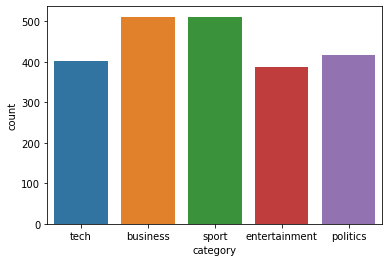

In [83]:
sns.countplot(df['category'])

In [84]:
df['text'][10]

'berlin cheers for anti-nazi film a german movie about an anti-nazi resistance heroine has drawn loud applause at berlin film festival.  sophie scholl - the final days portrays the final days of the member of the white rose movement. scholl  21  was arrested and beheaded with her brother  hans  in 1943 for distributing leaflets condemning the  abhorrent tyranny  of adolf hitler. director marc rothemund said:  i have a feeling of responsibility to keep the legacy of the scholls going.   we must somehow keep their ideas alive   he added.  the film drew on transcripts of gestapo interrogations and scholl s trial preserved in the archive of communist east germany s secret police. their discovery was the inspiration behind the film for rothemund  who worked closely with surviving relatives  including one of scholl s sisters  to ensure historical accuracy on the film. scholl and other members of the white rose resistance group first started distributing anti-nazi leaflets in the summer of 19

In [85]:
df.isnull().sum()

category    0
text        0
dtype: int64

# TEXT CLEANING-->

In [86]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = space.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = symbols.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [87]:
df['text']=df['text'].apply(clean_text)

In [88]:
df['text'][10]

'berlin cheers antinazi film german movie antinazi resistance heroine drawn loud applause berlin film festival sophie scholl final days portrays final days member white rose movement scholl 21 arrested beheaded brother hans 1943 distributing leaflets condemning abhorrent tyranny adolf hitler director marc rothemund said feeling responsibility keep legacy scholls going must somehow keep ideas alive added film drew transcripts gestapo interrogations scholl trial preserved archive communist east germany secret police discovery inspiration behind film rothemund worked closely surviving relatives including one scholl sisters ensure historical accuracy film scholl members white rose resistance group first started distributing antinazi leaflets summer 1942 arrested dropped leaflets munich university calling day reckoning adolf hitler regime film focuses si days scholl arrest intense trial saw scholl initially deny charges ended defiant appearance one three german films vying top prize festiva

In [89]:
df['text'][50]

'lewsey puzzle disallowed try england josh lewsey claimed denied late try side si nations loss ireland wasps wing insisted grounded ball bundled line said referee jonathan kaplan made wrong decision positive touched ball line lewsey told bbc sport certainly turnover driven put ball ground whistle went let go ball lewsey added one irish players scooped back whistle surprise referee gave turnover far concerned incident mark cueto effort charlie hodgson crossfield kick led looked like good try two key elements game cueto also puzzled try disallowed kaplan think could offside without doubt behind ball said sale player move planned technique cuff rehearse time time say robbed decisions go go today went us tough international level'

In [90]:
g=[]

In [91]:
for i in df['text']:
    g.append(i)

In [92]:
len(g)

2225

In [93]:
len(g[4])

1207

In [94]:
# for i in g:
#     print(len(i))

In [95]:
# g

In [96]:
maxl = max([len(s) for s in g])
print ('Maximum sequence length in the list of sentences:', maxl)

Maximum sequence length in the list of sentences: 16201


# So this will be the maximum length of padding..

In [97]:
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32485 unique tokens.


In [98]:
maxl

16201

# As the length maximum length of the sequence is much, we will be selection maximum length as 250.

In [99]:
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=400)

In [100]:
X.shape

(2225, 400)

In [101]:
Y = pd.get_dummies(df['category'],columns=df["category"]).values
Y

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [102]:
len(Y)

2225

In [103]:
Y[0]

array([0, 0, 0, 0, 1], dtype=uint8)

In [104]:
Y[1]

array([1, 0, 0, 0, 0], dtype=uint8)

In [105]:
Y[2]

array([0, 0, 0, 1, 0], dtype=uint8)

In [106]:
Y[2222]

array([0, 1, 0, 0, 0], dtype=uint8)

In [107]:
Y[2223]

array([0, 0, 1, 0, 0], dtype=uint8)

In [108]:
df.head(3)

,category,text
0,tech,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldcom...
2,sport,tigers wary farrell gamble leicester say rushe...


In [109]:
df.tail(3)

,category,text
2222,entertainment,rem announce new glasgow concert us band rem a...
2223,politics,political squabbles snowball become commonplac...
2224,sport,souness delight euro progress boss graeme soun...


# 1st Label->business
# 2nd Label->entertainment
# 3rd Label->politics
# 4th Label->sport
# 5th Label->tech

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2002, 400) (2002, 5)
(223, 400) (223, 5)


# MODEL-->

In [111]:
model=Sequential()
model.add(Embedding(50000,100,input_length=400))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 400, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 400, 100)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 505       
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________


In [113]:
history = model.fit(X_train, Y_train, epochs=7, batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1801 samples, validate on 201 samples
Epoch 1/7
1801/1801 [==============================] - 14s 7ms/step - loss: 1.5894 - accuracy: 0.2876 - val_loss: 1.5065 - val_accuracy: 0.4080
Epoch 2/7
1801/1801 [==============================] - 12s 7ms/step - loss: 1.2091 - accuracy: 0.5997 - val_loss: 0.7609 - val_accuracy: 0.7910
Epoch 3/7
1801/1801 [==============================] - 13s 7ms/step - loss: 0.6813 - accuracy: 0.7746 - val_loss: 0.4927 - val_accuracy: 0.8557
Epoch 4/7
1801/1801 [==============================] - 13s 7ms/step - loss: 0.4214 - accuracy: 0.8823 - val_loss: 0.2595 - val_accuracy: 0.9453
Epoch 5/7
1801/1801 [==============================] - 13s 7ms/step - loss: 0.2155 - accuracy: 0.9511 - val_loss: 0.2073 - val_accuracy: 0.9552
Epoch 6/7
1801/1801 [==============================] - 13s 7ms/step - loss: 0.1833 - accuracy: 0.9645 - val_loss: 0.2554 - val_accuracy: 0.9353
Epoch 7/7
1801/1801 [==============================] - 13s 7ms/step - loss: 0.1211 - accu

In [114]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

223/223 [==============================] - 1s 2ms/step
Test set
  Loss: 0.283
  Accuracy: 0.928


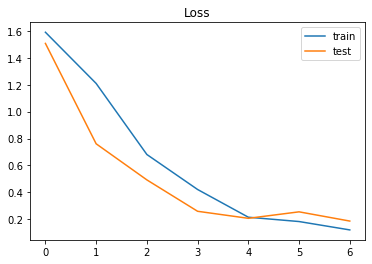

In [115]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

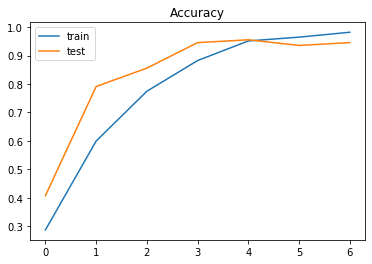

In [116]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [117]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

# 1st Label->business
# 2nd Label->entertainment
# 3rd Label->politics
# 4th Label->sport
# 5th Label->tech

In [119]:
new_complaint = ['Cricket Australia is set to begin the team’s pre-season later this month under a set of new training protocols devised for the safety of players amid the COVID-19 pandemic.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=400)
pred = model.predict(padded)
labels = ['Business','Entertainment','Politics','Sports','Tech']
print(pred, labels[np.argmax(pred)])

[[0.05555835 0.02724756 0.7373846  0.14659454 0.03321487]] Politics


In [121]:
new_complaint = ['Flipkart revealed the different items that Indians are looking for on the e-commerce site, as relaxing lockdown restrictions allow shopping to start again. Self-care and items to help work from home top the list, according to the e-commerce giant. ']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=400)
pred = model.predict(padded)
labels = ['Business','Entertainment','Politics','Sports','Tech']
print(pred, labels[np.argmax(pred)])

[[0.03253211 0.1485389  0.1695413  0.06155137 0.5878363 ]] Tech


In [122]:
new_complaint =['Additionally, the microsite on Amazon.in highlights some of the key features of the Mi 10. It shows that the phone will come with a 108-megapixel primary camera that will have optical image stabilisation (OIS) and 8K video recording. The microsite also claims that the Mi 10 will carry the worlds fastest wireless charging and include Qualcomm Snapdragon 865 SoC. You can also expect a 3D curved TrueColor E3 AMOLED display with a Corning Gorilla Glass protection on top and stereo speakers.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=400)
pred = model.predict(padded)
labels = ['Business','Entertainment','Politics','Sports','Tech']
print(pred, labels[np.argmax(pred)])

[[0.03082003 0.21935143 0.0644829  0.05384925 0.6314964 ]] Tech


In [124]:
new_complaint = ['Having undergone a surgery for shoulder dislocation last month, young Australian pacer Jhye Richardson is hopeful of recovering from the recurring injury by the time cricketing action resumes. Cricket Australias chief medical officer Alex Kountouris sounded optimistic of the fast bowlers recovery process with respect to a comeback later this year.Its a lengthy surgery but it does give him an opportunity now that were not going to play until ... September, October, November or December ... hes obviously a chance with that, Kountouris told News Corp in an interaction.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=400)
pred = model.predict(padded)
labels = ['Business','Entertainment','Politics','Sports','Tech']
print(pred, labels[np.argmax(pred)])

SyntaxError: EOL while scanning string literal (<ipython-input-124-0dc3535afaf4>, line 1)

# So we are seeing here that our model is predicting descently...